In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
#from mplfinance import candlestick_ohlc

# Default number of currencies we will look at at each step
x = 10

In [2]:
df = pd.read_csv('crypto-markets.csv')
#df.info()
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [3]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [5]:
# Get a df containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == '2018-02-05']
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1744,bitcoin,BTC,Bitcoin,2018-02-05,1,8270.540000,8364.840000,6756.680000,6955.270000,9.285290e+09,1.171844e+11,0.1235,1608.16
3688,ripple,XRP,XRP,2018-02-05,2,0.825943,0.833866,0.675827,0.691799,1.286180e+09,2.698654e+10,0.1011,0.16
4899,ethereum,ETH,Ethereum,2018-02-05,3,834.960000,856.650000,644.600000,697.950000,4.269530e+09,6.800528e+10,0.2516,212.05
6477,stellar,XLM,Stellar,2018-02-05,4,0.383191,0.425340,0.312975,0.331192,3.395070e+08,6.105930e+09,0.1621,0.11
6972,bitcoin-cash,BCH,Bitcoin Cash,2018-02-05,5,1159.890000,1172.700000,839.950000,887.410000,5.681170e+08,1.504285e+10,0.1426,332.75


In [6]:
# Number of cryptocurrencies listed
#latest_df.shape
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


1080

In [7]:
# What start date do we have for each cryptocurrency?
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
231,Bitcoin,1,2013-04-28
1284,Novacoin,700,2013-04-28
1241,Namecoin,371,2013-04-28
1776,Terracoin,895,2013-04-28
1393,Peercoin,159,2013-04-28
1089,Litecoin,7,2013-04-28
1181,Mincoin,1520,2013-05-03
760,Feathercoin,415,2013-05-03
787,Freicoin,1412,2013-05-03
1004,Ixcoin,1301,2013-05-08


In [8]:
# List the newest ones
print("Newest Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

Newest Cryptocurrencies


,name,ranknow,start_date
1178,Micromines,1134,2018-11-19
332,Business Credit Alliance Chain,453,2018-11-21
1282,Noir,1942,2018-11-21
942,ILCoin,1861,2018-11-27
1590,STACS,1785,2018-11-27
930,HyperQuant,1763,2018-11-27
215,BitNautic Token,1897,2018-11-28
146,BEAT,1849,2018-11-28
122,Atlas Protocol,1751,2018-11-28
283,Blockchain Certified Data Token,1905,2018-11-28


In [9]:
# Get a list of the top x currencies
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
10         [Cardano]
Name: name, dtype: object

In [10]:
# Is ranknow ordering the same as the marketcap ordering?
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

# Answer: Yes

,name,market
1744,Bitcoin,1.171844e+11
3688,XRP,2.698654e+10
4899,Ethereum,6.800528e+10
6477,Stellar,6.105930e+09
6972,Bitcoin Cash,1.504285e+10
7489,EOS,4.585049e+09
9531,Litecoin,6.903939e+09
10900,Tether,2.208955e+09
11346,Cardano,8.487771e+09
12999,Monero,2.815778e+09


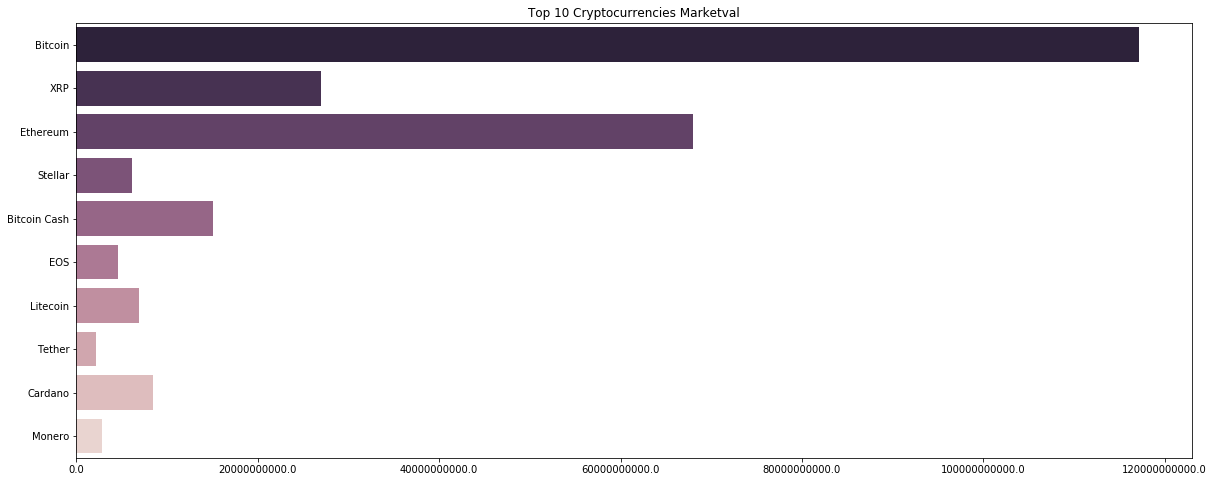

In [12]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top 10 Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

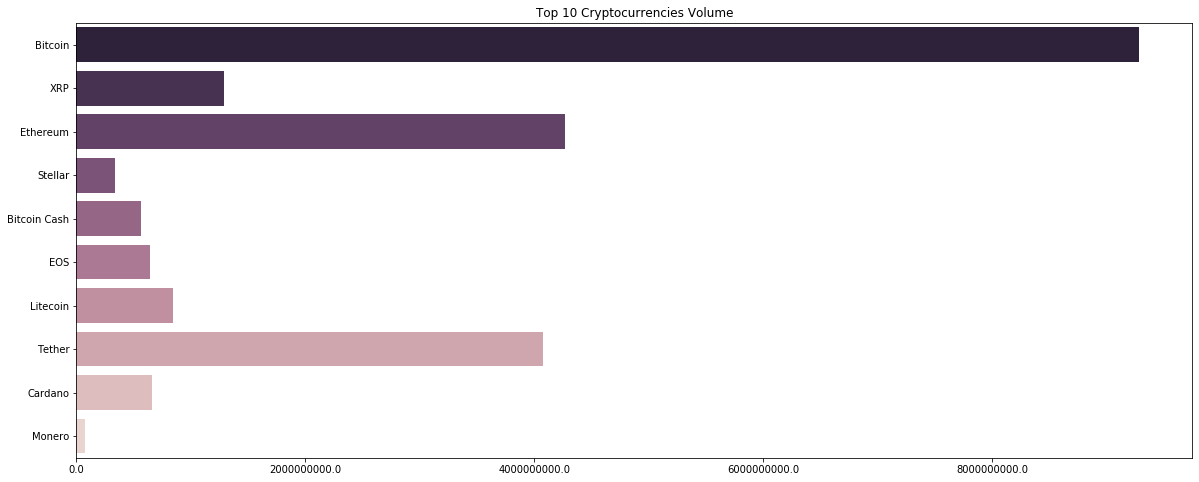

In [13]:
# Plot the top X currencies latest volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top 10 Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

In [66]:
import mpl_finance as mpf

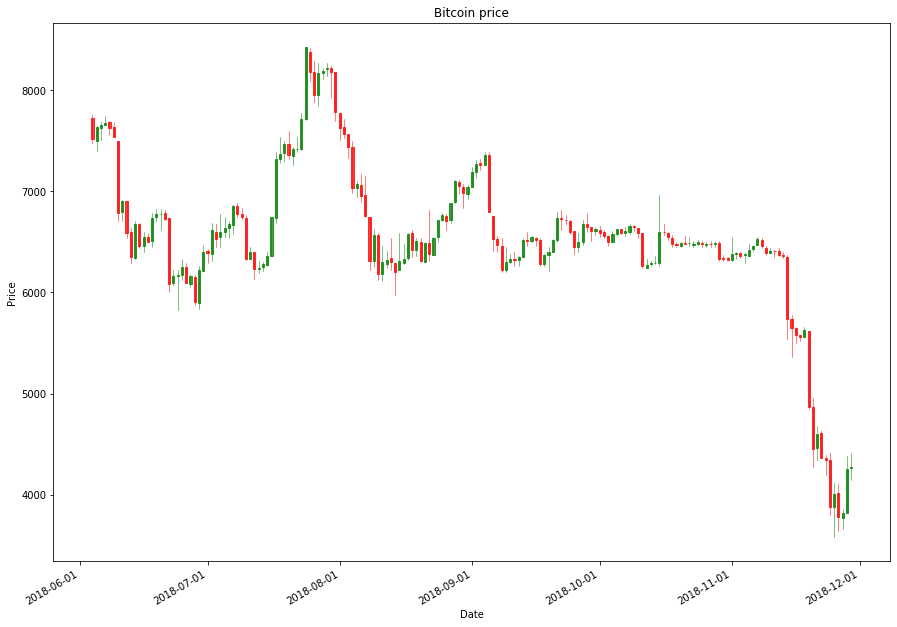

In [67]:
# Candlestick chart for Rank 1 currency (limited to 6 Months)
rank = 1
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
mpf.candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)
plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

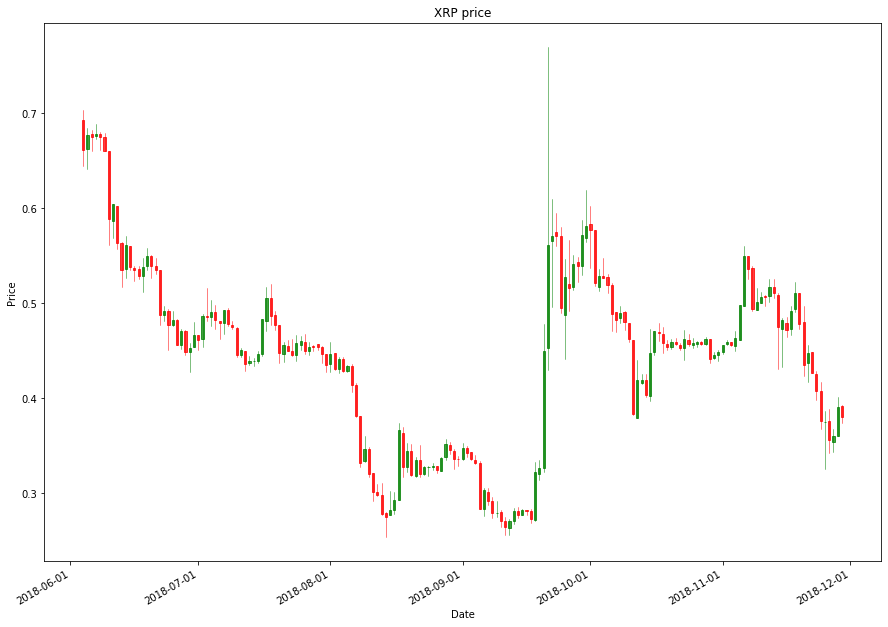

In [70]:
# Candlestick chart for Rank 2 currency (limited to 6 Months)
rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
mpf.candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

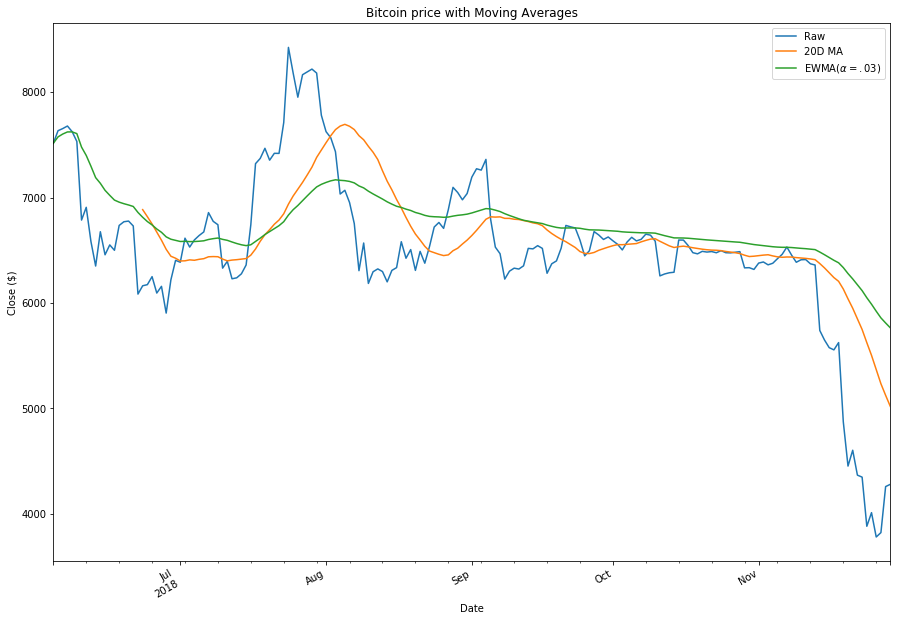

In [71]:
# Moving average chart for Rank 1 currency (6 months)
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

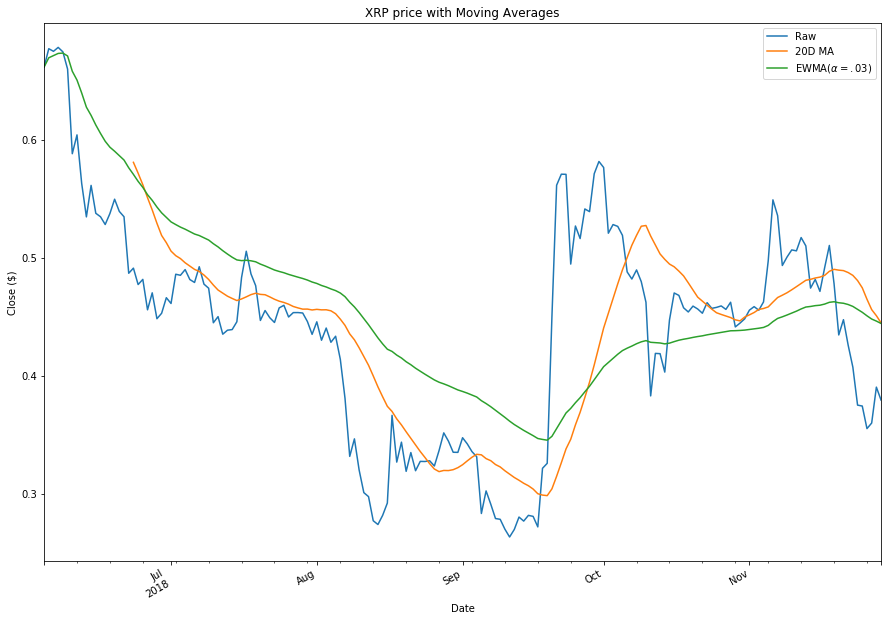

In [72]:
# Moving average chart for Rank 2 currency (6 months)
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

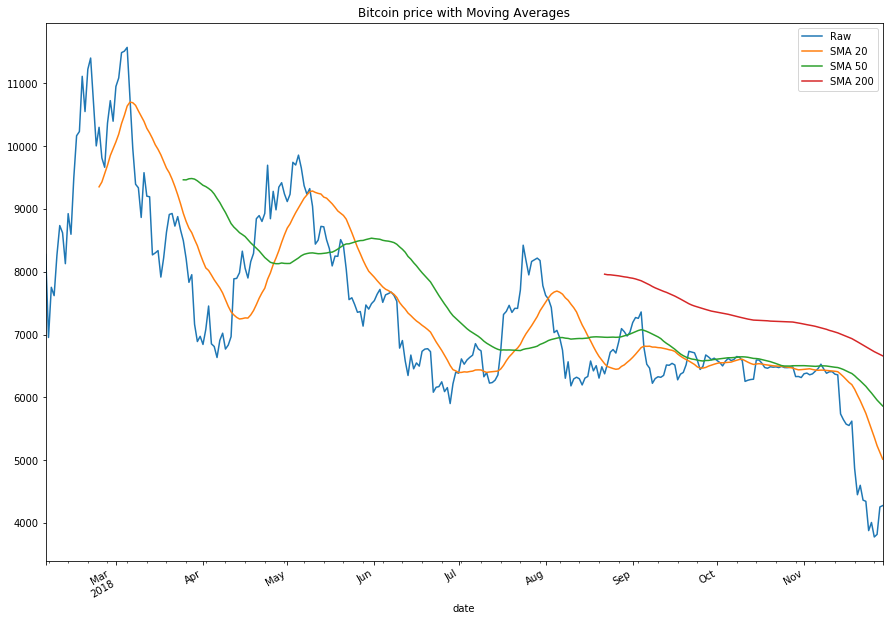

In [73]:
# Moving average chart for Rank 1 currency (10 months)
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

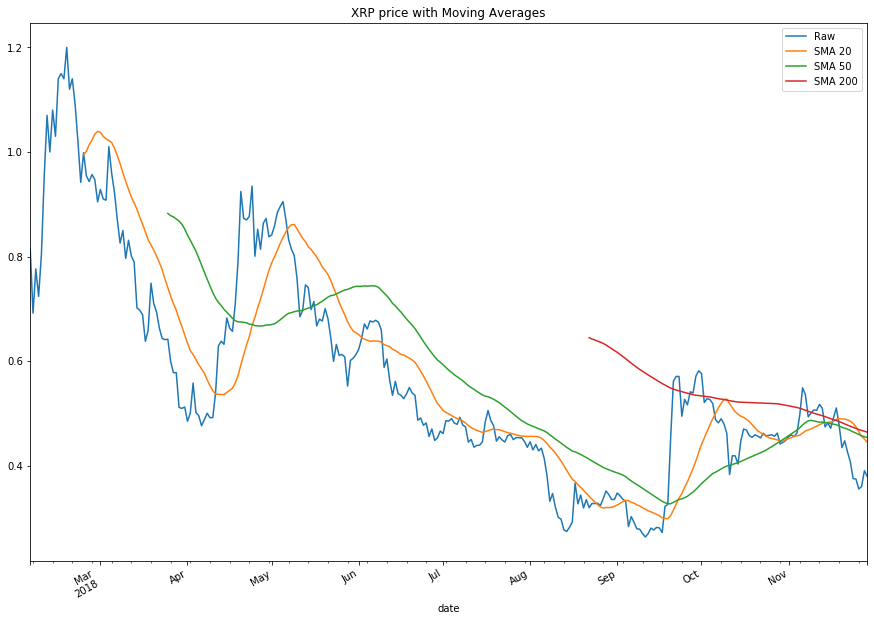

In [74]:
# Moving average chart for Rank 2 currency (10 months)
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()